In [1]:
import pandas as pd
import pickle 

import pandas as pd
import statistics as myStats
import glob
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
os.chdir('E:\Customer Analytics in Large Organisations')

# Revome scientific notation to expand numbers in the dataset up to the
# second decimal place.
pd.set_option('display.float_format', lambda x: '%.4f' % x)
#pd.set_option('display.float_format', lambda x: '%,g' % x)

data=pd.read_pickle('all_years.pkl')


In [2]:
data['Sale_Date'] = pd.to_datetime(data['Sale_Date'],)

data = data.sort_values(by="Sale_Date")
#data

In [3]:
yearDataFile = pd.DataFrame(data=data)
yearDataFile['UniSA_Customer_No'] = ['%.12g' % n for n in yearDataFile['UniSA_Customer_No']]
del yearDataFile['Barcode_Item']
del yearDataFile['Receipt_Line_No']
del yearDataFile['Total_Sale_Amount_InclusiveGST']
del yearDataFile['Item_Description']
del yearDataFile['Department_Name']
del yearDataFile['Commodity_Name']
del yearDataFile['Total_Receipt_Lines']
del yearDataFile['Quantity_Sold']
del yearDataFile['Offer']
yearDataFile

,Sale_Date,Sale_Time,UniSA_Receipt_No1,UniSA_Customer_No,Item_Value
100075,2013-01-02,15:14,525539,2690797360,9.9900
100701,2013-01-02,15:23,525542,4498461089,5.4900
100702,2013-01-02,15:23,525542,4498461089,5.4900
100703,2013-01-02,15:23,525542,4498461089,2.0200
100704,2013-01-02,15:23,525542,4498461089,3.1900
...,...,...,...,...,...
12186915,2015-12-31,09:45:46,15123111044042,9413990620,1.5700
12186914,2015-12-31,09:45:46,15123111044042,9413990620,1.4900
12186913,2015-12-31,09:45:46,15123111044042,9413990620,1.4200
12186887,2015-12-31,09:40:48,15123111044041,8548751290,1.4900


In [4]:
# Create a "TimeStamp" variable.

pd.options.mode.chained_assignment = None  # default='warn'

yearDataFile['Sale_Date'].astype(str)
yearDataFile["Sale_Time"][yearDataFile["Sale_Time"] == 'nan'] = "00:00:00"

In [5]:
yearDataFile['Sale_Time'] = yearDataFile['Sale_Time'].astype(str)
yearDataFile['Sale_Time_Length'] = yearDataFile['Sale_Time'].astype(str).map(len)

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'
Seconds = ':00'
yearDataFile["Sale_Time"][yearDataFile["Sale_Time_Length"] == 5] = yearDataFile["Sale_Time"] + Seconds

In [7]:
#Creating a new variable "Time Stamp"

yearDataFile['Sale_Date'] = yearDataFile['Sale_Date'].astype(str)
yearDataFile['TimeStamp'] = yearDataFile["Sale_Date"] + " " + yearDataFile["Sale_Time"]
#yearDataFile

In [8]:
# Generating a "Key" to find number of trips.

yearDataFile['UniSA_Receipt_No1'] = yearDataFile['UniSA_Receipt_No1'].astype(str)
yearDataFile['Key'] = yearDataFile['UniSA_Receipt_No1'] + yearDataFile['TimeStamp']
yearDataFile.drop('Sale_Time_Length', axis=1, inplace=True)
yearDataFile.drop('TimeStamp', axis=1, inplace=True)
#yearDataFile

In [9]:
# Download the file 

#yearDataFile.to_pickle("Modified_Data.pkl")

#df=pd.read_pickle('Modified_data.pkl')

In [14]:
# Convert the 'Sale_Date' to date-time format from string.

yearDataFile['Sale_Date'] = pd.to_datetime(yearDataFile['Sale_Date'])

In [16]:
yearDataFile['Sale_Date']

100075     2013-01-02
100701     2013-01-02
100702     2013-01-02
100703     2013-01-02
100704     2013-01-02
              ...    
12186915   2015-12-31
12186914   2015-12-31
12186913   2015-12-31
12186887   2015-12-31
12201505   2015-12-31
Name: Sale_Date, Length: 37371576, dtype: datetime64[ns]

In [17]:
# Transform the "Sale Date" column into three different columns, one each for "Sale Day", "Sale Month" and "Sale Year".

yearDataFile['Year'] = pd.DatetimeIndex(yearDataFile['Sale_Date']).year

In [42]:
# Split data by years

df2013 = yearDataFile[yearDataFile['Year'] == 2013]
df2014 = yearDataFile[yearDataFile['Year'] == 2014]
df2015 = yearDataFile[yearDataFile['Year'] == 2015]
#df2013

In [43]:
# Finding week number for 2013 data.

df2013['Week'] = df2013['Sale_Date'].dt.isocalendar().week
df2013[df2013['Week'] == 1]

,Sale_Date,Sale_Time,UniSA_Receipt_No1,UniSA_Customer_No,Item_Value,Key,Year,Week
100075,2013-01-02,15:14:00,525539,2690797360,9.9900,5255392013-01-02 15:14:00,2013,1
100701,2013-01-02,15:23:00,525542,4498461089,5.4900,5255422013-01-02 15:23:00,2013,1
100702,2013-01-02,15:23:00,525542,4498461089,5.4900,5255422013-01-02 15:23:00,2013,1
100703,2013-01-02,15:23:00,525542,4498461089,2.0200,5255422013-01-02 15:23:00,2013,1
100704,2013-01-02,15:23:00,525542,4498461089,3.1900,5255422013-01-02 15:23:00,2013,1
...,...,...,...,...,...,...,...,...
12498745,2013-12-31,11:53:00,400758,5045104419,6.2300,4007582013-12-31 11:53:00,2013,1
12498746,2013-12-31,11:53:00,400758,5045104419,1.7900,4007582013-12-31 11:53:00,2013,1
12498747,2013-12-31,11:53:00,400758,5045104419,1.7900,4007582013-12-31 11:53:00,2013,1
12498748,2013-12-31,11:53:00,400758,5045104419,3.5900,4007582013-12-31 11:53:00,2013,1


In [44]:
A = df2013[df2013['Sale_Date'] >= '2013-12-30']
df2013 = df2013[df2013['Sale_Date'] < '2013-12-30']
df2013

,Sale_Date,Sale_Time,UniSA_Receipt_No1,UniSA_Customer_No,Item_Value,Key,Year,Week
100075,2013-01-02,15:14:00,525539,2690797360,9.9900,5255392013-01-02 15:14:00,2013,1
100701,2013-01-02,15:23:00,525542,4498461089,5.4900,5255422013-01-02 15:23:00,2013,1
100702,2013-01-02,15:23:00,525542,4498461089,5.4900,5255422013-01-02 15:23:00,2013,1
100703,2013-01-02,15:23:00,525542,4498461089,2.0200,5255422013-01-02 15:23:00,2013,1
100704,2013-01-02,15:23:00,525542,4498461089,3.1900,5255422013-01-02 15:23:00,2013,1
...,...,...,...,...,...,...,...,...
12439994,2013-12-29,11:06:00,386514,460965590,2.4900,3865142013-12-29 11:06:00,2013,52
12439995,2013-12-29,11:06:00,386514,460965590,2.4900,3865142013-12-29 11:06:00,2013,52
12439997,2013-12-29,11:06:00,386514,460965590,2.4900,3865142013-12-29 11:06:00,2013,52
12439993,2013-12-29,11:06:00,386514,460965590,3.7400,3865142013-12-29 11:06:00,2013,52


In [45]:
# Finding week number for 2014 data.

df2014['Week'] = df2014['Sale_Date'].dt.isocalendar().week
df2014 = A.append(df2014, ignore_index=True) 
df2014

,Sale_Date,Sale_Time,UniSA_Receipt_No1,UniSA_Customer_No,Item_Value,Key,Year,Week
0,2013-12-30,12:18:00,386711,6580045259,11.7200,3867112013-12-30 12:18:00,2013,1
1,2013-12-30,12:18:00,386711,6580045259,2.2900,3867112013-12-30 12:18:00,2013,1
2,2013-12-30,12:18:00,386711,6580045259,6.4900,3867112013-12-30 12:18:00,2013,1
3,2013-12-30,12:18:00,386711,6580045259,2.2500,3867112013-12-30 12:18:00,2013,1
4,2013-12-30,12:18:00,386711,6580045259,2.3200,3867112013-12-30 12:18:00,2013,1
...,...,...,...,...,...,...,...,...
12640546,2014-12-31,11:30:20,42665,1647735944,2.9900,426652014-12-31 11:30:20,2014,1
12640547,2014-12-31,11:30:20,42665,1647735944,7.1900,426652014-12-31 11:30:20,2014,1
12640548,2014-12-31,11:30:20,42665,1647735944,6.9900,426652014-12-31 11:30:20,2014,1
12640549,2014-12-31,11:30:20,42665,1647735944,3.2900,426652014-12-31 11:30:20,2014,1


In [50]:
B = df2014[df2014['Sale_Date'] >= '2014-12-29']
df2014 = df2014[df2014['Sale_Date'] < '2014-12-29']
df2014

,Sale_Date,Sale_Time,UniSA_Receipt_No1,UniSA_Customer_No,Item_Value,Key,Year,Week
0,2013-12-30,12:18:00,386711,6580045259,11.7200,3867112013-12-30 12:18:00,2013,1
1,2013-12-30,12:18:00,386711,6580045259,2.2900,3867112013-12-30 12:18:00,2013,1
2,2013-12-30,12:18:00,386711,6580045259,6.4900,3867112013-12-30 12:18:00,2013,1
3,2013-12-30,12:18:00,386711,6580045259,2.2500,3867112013-12-30 12:18:00,2013,1
4,2013-12-30,12:18:00,386711,6580045259,2.3200,3867112013-12-30 12:18:00,2013,1
...,...,...,...,...,...,...,...,...
12515057,2014-12-28,13:39:23,42374,4737911487,0.7900,423742014-12-28 13:39:23,2014,52
12515058,2014-12-28,13:39:23,42374,4737911487,3.9900,423742014-12-28 13:39:23,2014,52
12515059,2014-12-28,13:39:23,42374,4737911487,1.5300,423742014-12-28 13:39:23,2014,52
12515060,2014-12-28,13:39:23,42374,4737911487,3.1200,423742014-12-28 13:39:23,2014,52


In [51]:
# Finding week number for 2015 data.

df2015['Week'] = df2015['Sale_Date'].dt.isocalendar().week
df2015 = B.append(df2015, ignore_index=True) 
df2015

,Sale_Date,Sale_Time,UniSA_Receipt_No1,UniSA_Customer_No,Item_Value,Key,Year,Week
0,2014-12-29,17:24:06,46729,2287984358,3.9900,467292014-12-29 17:24:06,2014,1
1,2014-12-29,17:24:06,46729,2287984358,3.9900,467292014-12-29 17:24:06,2014,1
2,2014-12-29,17:24:06,46729,2287984358,5.0000,467292014-12-29 17:24:06,2014,1
3,2014-12-29,17:32:31,46730,718466353,1.2900,467302014-12-29 17:32:31,2014,1
4,2014-12-29,17:24:06,46729,2287984358,4.2900,467292014-12-29 17:24:06,2014,1
...,...,...,...,...,...,...,...,...
12410939,2015-12-31,09:45:46,15123111044042,9413990620,1.5700,151231110440422015-12-31 09:45:46,2015,53
12410940,2015-12-31,09:45:46,15123111044042,9413990620,1.4900,151231110440422015-12-31 09:45:46,2015,53
12410941,2015-12-31,09:45:46,15123111044042,9413990620,1.4200,151231110440422015-12-31 09:45:46,2015,53
12410942,2015-12-31,09:40:48,15123111044041,8548751290,1.4900,151231110440412015-12-31 09:40:48,2015,53


In [53]:
# First aggregate the 2013 data by week.


aggregations1 = {
   "Item_Value": "sum",
   "Key": pd.Series.nunique
}

GroupWeek2013 = df2013.groupby(by = ["Week"], as_index = False).agg(aggregations1).rename(columns = {"Item_Value": "Weekly_Total_Sales", "Key": "Weekly_Total_Trips"})
GroupWeek2013

,Week,Weekly_Total_Sales,Weekly_Total_Trips
0,1,727364.7500,13313
1,2,920332.1500,18371
2,3,940726.4600,18176
3,4,978813.5100,18724
4,5,942373.0400,17818
5,6,960418.2900,18757
6,7,1029110.6800,19997
7,8,929383.9400,18839
8,9,952839.5600,18699
9,10,1022479.1200,20273


In [54]:
# First aggregate the 2014 data by week.


aggregations2 = {
   "Item_Value": "sum",
   "Key": pd.Series.nunique
}

GroupWeek2014 = df2014.groupby(by = ["Week"], as_index = False).agg(aggregations2).rename(columns = {"Item_Value": "Weekly_Total_Sales", "Key": "Weekly_Total_Trips"})
GroupWeek2014

,Week,Weekly_Total_Sales,Weekly_Total_Trips
0,1,908236.8700,16250
1,2,965710.1200,18223
2,3,968321.2200,18176
3,4,1030003.0700,18632
4,5,1008106.6700,18105
5,6,1016374.0800,18635
6,7,1018504.2300,18665
7,8,994294.4900,18466
8,9,1002250.1800,18578
9,10,1054961.6258,19555


In [55]:
# First aggregate the 2015 data by week.


aggregations3 = {
   "Item_Value": "sum",
   "Key": pd.Series.nunique
}

GroupWeek2015 = df2015.groupby(by = ["Week"], as_index = False).agg(aggregations3).rename(columns = {"Item_Value": "Weekly_Total_Sales", "Key": "Weekly_Total_Trips"})
GroupWeek2015

,Week,Weekly_Total_Sales,Weekly_Total_Trips
0,1,922359.6700,16334
1,2,1009602.8300,18043
2,3,973376.0700,17522
3,5,94983.6600,1748
4,6,985829.4900,18418
5,7,1084778.6700,18898
6,8,1041714.3100,18783
7,9,1023942.9100,18458
8,10,1064134.7900,19144
9,11,1037017.9200,18354


In [56]:
# Assigning the new week values to 2014 data.

GroupWeek2014['Week'] = range(53, 53+len(GroupWeek2014))
GroupWeek2014

,Week,Weekly_Total_Sales,Weekly_Total_Trips
0,53,908236.8700,16250
1,54,965710.1200,18223
2,55,968321.2200,18176
3,56,1030003.0700,18632
4,57,1008106.6700,18105
5,58,1016374.0800,18635
6,59,1018504.2300,18665
7,60,994294.4900,18466
8,61,1002250.1800,18578
9,62,1054961.6258,19555


In [57]:
# Assigning the new week values to 2015 data.

GW2015_1 = GroupWeek2015.iloc[:3]
GW2015_2 = GroupWeek2015.iloc[3:52]

GW2015_1['Week'] = range(105, 105+len(GW2015_1))
GW2015_2['Week'] = range(109, 109+len(GW2015_2))
GroupWeek2015 = GW2015_1.append(GW2015_2, ignore_index=True)
GroupWeek2015

,Week,Weekly_Total_Sales,Weekly_Total_Trips
0,105,922359.6700,16334
1,106,1009602.8300,18043
2,107,973376.0700,17522
3,109,94983.6600,1748
4,110,985829.4900,18418
5,111,1084778.6700,18898
6,112,1041714.3100,18783
7,113,1023942.9100,18458
8,114,1064134.7900,19144
9,115,1037017.9200,18354


In [195]:
# Append all data from 3 years to one. That data will be grouped weekly data.

sample = GroupWeek2013.append(GroupWeek2014, ignore_index=True)
WeeklyTotal1 = sample.append(GroupWeek2015, ignore_index=True)
WeeklyTotal1

,Week,Weekly_Total_Sales,Weekly_Total_Trips
0,1,727364.7500,13313
1,2,920332.1500,18371
2,3,940726.4600,18176
3,4,978813.5100,18724
4,5,942373.0400,17818
...,...,...,...
151,153,1099724.4300,19318
152,154,1048967.4600,19078
153,155,1197133.1700,20471
154,156,1216750.0100,18407


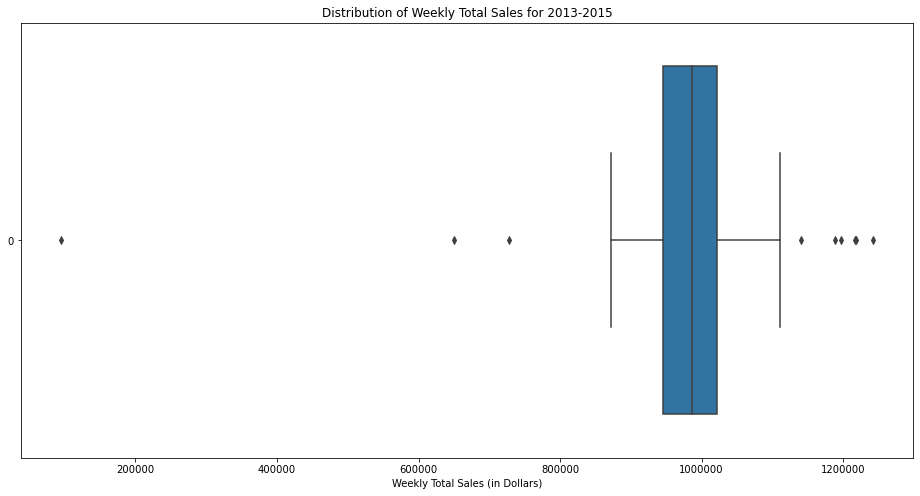

In [196]:
# Plot Weekly Sales

plt.figure(figsize = (16, 8))
sb.boxplot(data=WeeklyTotal1['Weekly_Total_Sales'], orient="h")
plt.xlabel("Weekly Total Sales (in Dollars)")
plt.title("Distribution of Weekly Total Sales for 2013-2015")
plt.ticklabel_format(style='plain', axis='x')

In [205]:
# Remove outliers towards left because those are incomplete data.

WeeklyTotal2 = WeeklyTotal1[WeeklyTotal1['Week'] != 1]
WeeklyTotal3 = WeeklyTotal2[WeeklyTotal2['Week'] != 109]
WeeklyTotal = WeeklyTotal3[WeeklyTotal3['Week'] != 157]
WeeklyTotal
#WeeklyTotal[WeeklyTotal['Weekly_Total_Trips'] < 15000]

,Week,Weekly_Total_Sales,Weekly_Total_Trips
1,2,920332.1500,18371
2,3,940726.4600,18176
3,4,978813.5100,18724
4,5,942373.0400,17818
5,6,960418.2900,18757
...,...,...,...
150,152,1026162.4700,18473
151,153,1099724.4300,19318
152,154,1048967.4600,19078
153,155,1197133.1700,20471


In [206]:
# Average sales per week.

WeeklyTotal1['Weekly_Total_Sales'].describe()

count       156.0000
mean     983603.6618
std      101965.4253
min       94983.6600
25%      945895.9550
50%      986140.9800
75%     1021619.7850
max     1242001.2371
Name: Weekly_Total_Sales, dtype: float64

In [207]:
# Avergae number of visits per week

WeeklyTotal1['Weekly_Total_Trips'].describe()

count     156.0000
mean    18125.5128
std      1666.9885
min      1748.0000
25%     17816.7500
50%     18310.5000
75%     18678.2500
max     20914.0000
Name: Weekly_Total_Trips, dtype: float64

In [192]:
# Average Sales per customer per visit.

aggregations4 = {
   "Item_Value": "sum",
   "Key": pd.Series.nunique
}

GroupDay = yearDataFile.groupby(by = ["Sale_Date", "Sale_Time", "UniSA_Receipt_No1"], as_index = False).agg(aggregations4).rename(columns = {"Key": "No_of_Trips", "Item_Value": "Daily_Sales"})
GroupDay = GroupDay.sort_values(by="Sale_Date")
GroupDay

,Sale_Date,Sale_Time,UniSA_Receipt_No1,Daily_Sales,No_of_Trips
0,2013-01-02,07:43:00,734714,5.1000,1
2068,2013-01-02,15:21:00,525541,107.8300,1
2069,2013-01-02,15:21:00,751156,32.9300,1
2070,2013-01-02,15:22:00,341656,39.5800,1
2071,2013-01-02,15:22:00,356363,125.9500,1
...,...,...,...,...,...
2825183,2015-12-31,11:37:08,15123121045387,81.4400,1
2825184,2015-12-31,11:37:10,15123108046051,57.5400,1
2825185,2015-12-31,11:37:15,15123116049102,53.3000,1
2825215,2015-12-31,11:39:43,15123111044091,54.9600,1


In [193]:
GroupDay.describe()

,Daily_Sales,No_of_Trips
count,2827580.0000,2827580.0000
mean,54.2663,1.0000
std,92.3464,0.0000
min,-11885.9500,1.0000
25%,12.2600,1.0000
50%,29.8600,1.0000
75%,67.6100,1.0000
max,19750.4800,1.0000


In [139]:
# Calculate statistics of distribution

pd.options.mode.chained_assignment = None  # default='warn'

WeeklyTotal["Weekly_Total_Sales"] = pd.to_numeric(WeeklyTotal["Weekly_Total_Sales"]).round(2)

# Mean for the distribution
print("Mean Weekly Total Sales: $" + str(round(myStats.mean(WeeklyTotal["Weekly_Total_Sales"]), 2)))

# Median for the distribution
print("Median Weekly Total Sales: $" + str(round(myStats.median(WeeklyTotal["Weekly_Total_Sales"]), 2)))

# Standard Deviation for the distribution
print("Volatility Weekly Total Sales: $" + str(round(myStats.stdev(WeeklyTotal["Weekly_Total_Sales"]), 2)))

Mean Weekly Total Sales: $993270.28
Median Weekly Total Sales: $986872.94
Volatility Weekly Total Sales: $64393.97


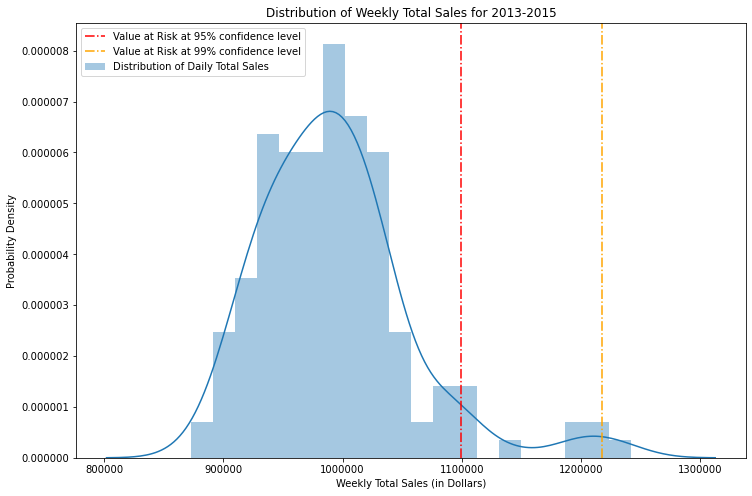

In [169]:
#Plot weekly sales distribution.

from matplotlib import *
import sys
from pylab import *

plt.figure(figsize = (12, 8))
sb.distplot(WeeklyTotal["Weekly_Total_Sales"], label = "Distribution of Daily Total Sales", bins = 20, kde = True)
plt.axvline(round(WeeklyTotal["Weekly_Total_Sales"].quantile(.95), 2), color = "red", linestyle = "-.", label = "Value at Risk at 95% confidence level")
plt.axvline(round(WeeklyTotal["Weekly_Total_Sales"].quantile(.99), 2), color = "orange", linestyle = "-.", label = "Value at Risk at 99% confidence level")
plt.xlabel("Weekly Total Sales (in Dollars)")
plt.ylabel("Probability Density")
plt.title("Distribution of Weekly Total Sales for 2013-2015")
plt.legend()
plt.ticklabel_format(style='plain')
plt.show()

In [174]:
# Calculating Value at Risk for Weekly Total Sales at 5% and 1% significance level:

print("Value at Risk for Daily Sales at 95% confidence level: $" + str(round(WeeklyTotal["Weekly_Total_Sales"].quantile(.95), 2)))
print("Value at Risk for Daily Sales at 99% confidence level: $" + str(round(WeeklyTotal["Weekly_Total_Sales"].quantile(.99), 2)))

Value at Risk for Daily Sales at 95% confidence level: $1099138.55
Value at Risk for Daily Sales at 99% confidence level: $1217561.55


In [171]:
dist = getattr(stats, 'gamma')
parameters = dist.fit(WeeklyTotal["Weekly_Total_Sales"])
print(parameters)

from scipy import stats
stats.kstest(WeeklyTotal["Weekly_Total_Sales"], "gamma", parameters)

(1543.2662277554045, -1489135.1388285551, 1608.5033119473683)


KstestResult(statistic=0.09531543890364202, pvalue=0.11621470694541636)

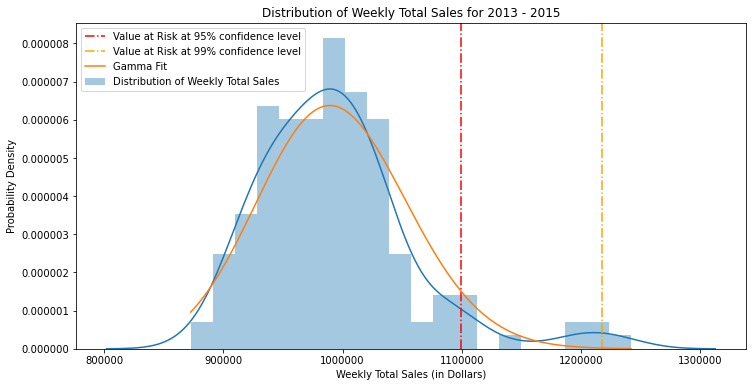

In [215]:
import scipy.stats as scipyStats
from matplotlib import *
import sys
from pylab import *

plt.figure(figsize = (12, 6))
sb.distplot(WeeklyTotal["Weekly_Total_Sales"], label = "Distribution of Weekly Total Sales", bins = 20, kde = True)
plt.axvline(round(WeeklyTotal["Weekly_Total_Sales"].quantile(.95), 2), color = "red", linestyle = "-.", label = "Value at Risk at 95% confidence level")
plt.axvline(round(WeeklyTotal["Weekly_Total_Sales"].quantile(.99), 2), color = "orange", linestyle = "-.", label = "Value at Risk at 99% confidence level")
plt.xlabel("Weekly Total Sales (in Dollars)")
plt.ylabel("Probability Density")
plt.title("Distribution of Weekly Total Sales for 2013 - 2015")

# Fitting a probability distribution ot the data.

xAxisTicks = plt.xticks()[0]
lineSpace = np.linspace(min(WeeklyTotal["Weekly_Total_Sales"]), max(WeeklyTotal["Weekly_Total_Sales"]), len(WeeklyTotal["Weekly_Total_Sales"]))
fitAlpha, fitLoc, fitBeta = scipyStats.gamma.fit(WeeklyTotal["Weekly_Total_Sales"], loc = 0)
gammaFit = scipyStats.gamma.pdf(lineSpace, fitAlpha, fitLoc, fitBeta)
plt.plot(lineSpace, gammaFit, label = "Gamma Fit")
plt.legend()
plt.ticklabel_format(style='plain')
plt.show()

In [175]:
# Estimate a new gamma distribution using the obtained values of
# alpha an beta.
gammaDist = scipyStats.gamma.rvs(fitAlpha, fitLoc, fitBeta, size = 153)

# Calculating Risk Level for Daily Total Sales using Volatility:
print("Risk Level for Weekly Sales: $" + str(round(myStats.mean(gammaDist) - myStats.stdev(gammaDist), 2)))

# Calculating Value at Risk for Weekly Total Sales at 5% significance level:
print("Estimated Gamma Distribution Value at Risk for Weekly Sales at 95% confidence: $" + str(round(pd.Series(gammaDist).quantile(0.95), 2)))

# Calculating Value at Risk for Weekly Total Sales at 1% significance level:
print("Estimated Gamma Distribution Value at Risk for Weekly Sales at 99% confidence: $" + str(round(pd.Series(gammaDist).quantile(0.99), 2)))

Risk Level for Weekly Sales: $929868.34
Estimated Gamma Distribution Value at Risk for Weekly Sales at 95% confidence: $1105119.83
Estimated Gamma Distribution Value at Risk for Weekly Sales at 99% confidence: $1150298.43


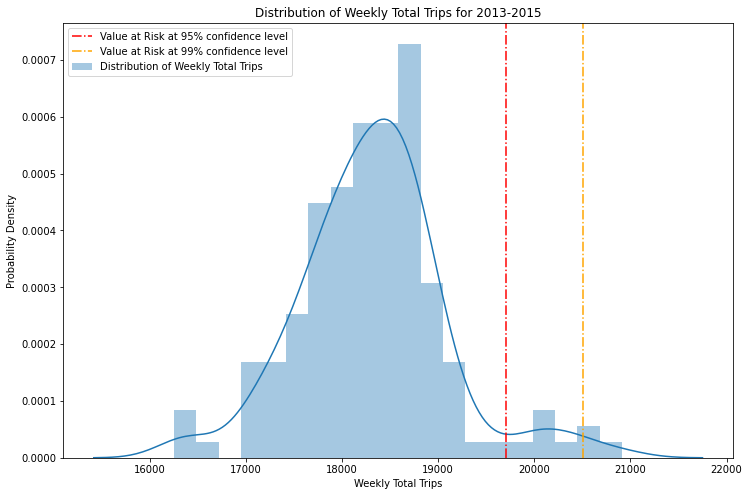

In [216]:
#Plot weekly trips distribution.

from matplotlib import *
import sys
from pylab import *

plt.figure(figsize = (12, 8))
sb.distplot(WeeklyTotal["Weekly_Total_Trips"], label = "Distribution of Weekly Total Trips", bins = 20, kde = True)
plt.axvline(round(WeeklyTotal["Weekly_Total_Trips"].quantile(.95), 2), color = "red", linestyle = "-.", label = "Value at Risk at 95% confidence level")
plt.axvline(round(WeeklyTotal["Weekly_Total_Trips"].quantile(.99), 2), color = "orange", linestyle = "-.", label = "Value at Risk at 99% confidence level")
plt.xlabel("Weekly Total Trips")
plt.ylabel("Probability Density")
plt.title("Distribution of Weekly Total Trips for 2013-2015")
plt.legend()
plt.ticklabel_format(style='plain')
plt.show()

In [217]:
# Calculating Value at Risk for Weekly Total Sales at 5% and 1% significance level:

print("Value at Risk for Weekly Total Trips at 95% confidence level: $" + str(round(WeeklyTotal["Weekly_Total_Trips"].quantile(.95), 2)))
print("Value at Risk for Weekly Total Trips at 99% confidence level: $" + str(round(WeeklyTotal["Weekly_Total_Trips"].quantile(.99), 2)))

Value at Risk for Weekly Total Trips at 95% confidence level: $19706.6
Value at Risk for Weekly Total Trips at 99% confidence level: $20505.08


In [219]:
dist = getattr(stats, 'binom')
parameters = dist.fit(WeeklyTotal["Weekly_Total_Trips"])
print(parameters)

from scipy import stats
stats.kstest(WeeklyTotal["Weekly_Total_Trips"], "binom", parameters)

AttributeError: 'binom_gen' object has no attribute 'fit'

In [ ]:
import scipy.stats as scipyStats
from matplotlib import *
import sys
from pylab import *

plt.figure(figsize = (12, 6))
sb.distplot(WeeklyTotal["Weekly_Total_Trips"], label = "Distribution of Weekly Total Trips", bins = 20, kde = True)
plt.axvline(round(WeeklyTotal["Weekly_Total_Trips"].quantile(.95), 2), color = "red", linestyle = "-.", label = "Value at Risk at 95% confidence level")
plt.axvline(round(WeeklyTotal["Weekly_Total_Trips"].quantile(.99), 2), color = "orange", linestyle = "-.", label = "Value at Risk at 99% confidence level")
plt.xlabel("Weekly Total Trips")
plt.ylabel("Probability Density")
plt.title("Distribution of Weekly Total Trips for 2013 - 2015")

# Fitting a probability distribution ot the data.

xAxisTicks = plt.xticks()[0]
lineSpace = np.linspace(min(WeeklyTotal["Weekly Total Trips"]), max(WeeklyTotal["Weekly Total Trips"]), len(WeeklyTotal["Weekly_Total_Sales"]))
fitAlpha, fitLoc, fitBeta = scipyStats.gamma.fit(WeeklyTotal["Weekly_Total_Sales"], loc = 0)
gammaFit = scipyStats.gamma.pdf(lineSpace, fitAlpha, fitLoc, fitBeta)
plt.plot(lineSpace, gammaFit, label = "Gamma Fit")
plt.legend()
plt.ticklabel_format(style='plain')
plt.show()